### Assignment 2

## Part 1

In [6]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')
library(dslabs)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
data(divorce_margarine)
str(divorce_margarine)

'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


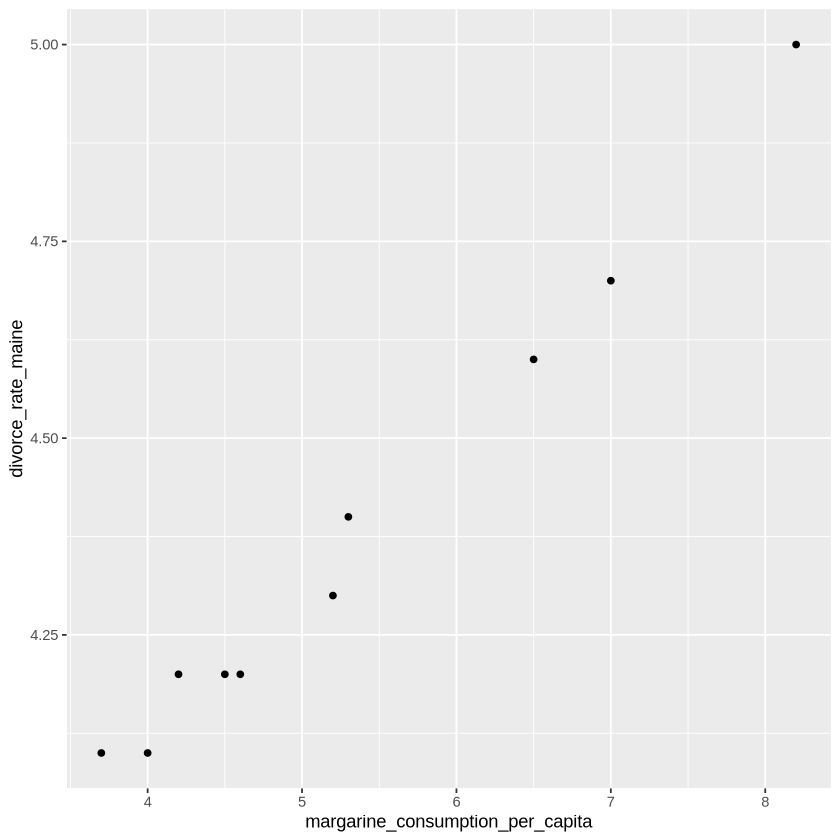

In [7]:
ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita,
           y = divorce_rate_maine)) +
    geom_point()

In [8]:
cor.test(divorce_margarine$margarine_consumption_per_capita, divorce_margarine$divorce_rate_maine)


	Pearson's product-moment correlation

data:  divorce_margarine$margarine_consumption_per_capita and divorce_margarine$divorce_rate_maine
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


There seems to be a correlation between the variables because r is close 1 (0.993), which tracks with the visual from the plot

According to the model there is a positive correlation between an increase in margarine sales and divorce rates. Although there is a correlation, this does not necesarrily point towards a causation, so it is not possible to conclude from this data alone if an increase  in  the preference for margarine would lead to skyrocketing divorce rate.

## Part two

In [9]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘backports’, ‘cowplot’, ‘Deriv’, ‘modelr’, ‘microbenchmark’, ‘broom’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘survival’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [11]:
data(GSSvocab)
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [21]:
#Filter by year 1978
data1978 <- GSSvocab %>%
    filter(year == 1978) %>%
    na.exclude(data1978)
str(data1978)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


In [16]:
#chech how many unique scores in the year variable
unique(data1978$year)

[1] 1978
20 Levels: 1978 1982 1984 1987 1988 1989 1990 1991 1993 1994 1996 1998 ... 2016

Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of education (‘educ’)? 
Visualize the relationship in a plot and build a model. 

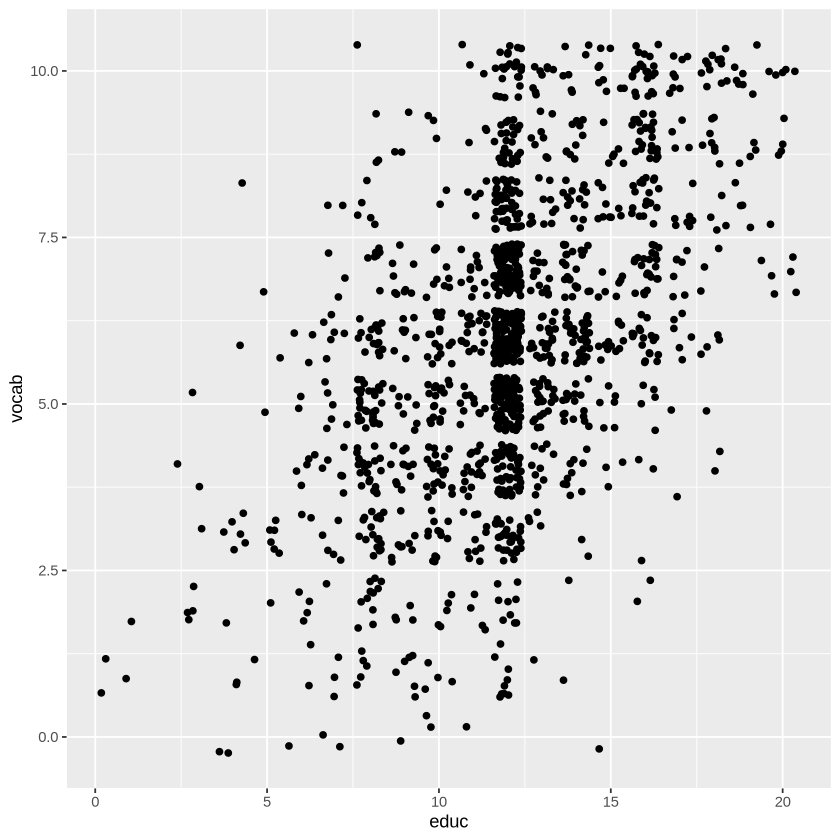

In [23]:
#visualize relationship
ggplot(data1978,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter')

In [24]:
cor.test(data1978$educ, data1978$vocab)


	Pearson's product-moment correlation

data:  data1978$educ and data1978$vocab
t = 24.443, df = 1475, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4996008 0.5722586
sample estimates:
      cor 
0.5369246 


In [25]:
#making a linear model
vocab_model <- lm(vocab ~ educ, data1978)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


In [26]:
#There a positive correlation between education level and vocabulary because the p-value is significant, but the value of r-squared 
#indicates that the linear model I have created only accounts for about 29% of the variance from of the data from model

Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially
have an impact on the size of their vocabulary. Visualize the relationship and add the predictor
to the model. Briefly explain the results.

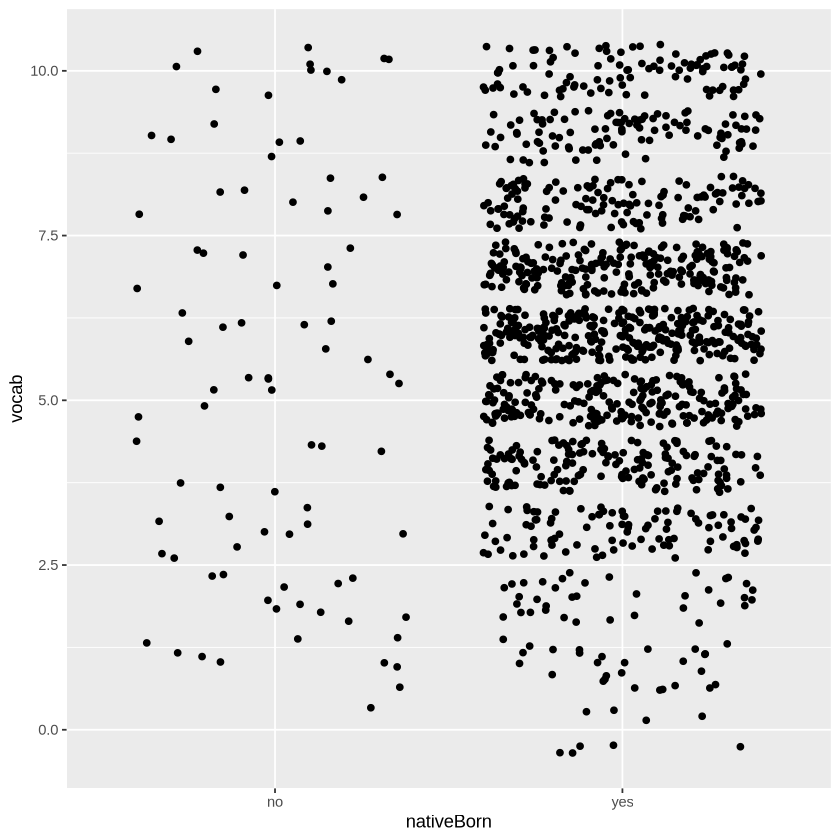

In [29]:
#scatterplot
ggplot(data1978,
       aes(x= nativeBorn,
           y = vocab)) +
    geom_point(position = 'jitter')

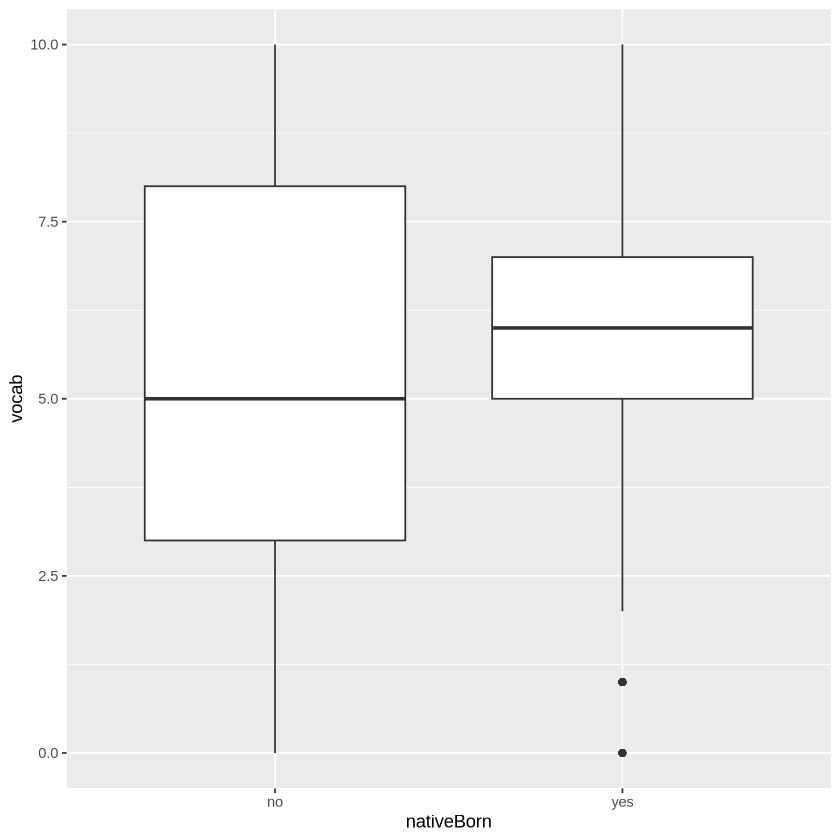

In [33]:
#boxplot
ggplot(data1978,
       aes(x= nativeBorn,
           y = vocab)) +
    geom_boxplot()

The results indicate that native born people have a higher vocab score mean than non-natives, and that the 